In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.display.max_columns = 100

import warnings
warnings.filterwarnings("ignore")

In [2]:
df_bike = pd.read_csv("train.csv")
df_bike.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
df_bike.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [4]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [5]:
df_bike.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

# Feature Engineering

We are going to work on the dataset in order to make the subsequent exploratory analysis slightly easier and more insightful. 

In [8]:
df_bike["datetime"] = pd.to_datetime(df_bike["datetime"])
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [11]:
df_bike["dow"] = df_bike["datetime"].dt.dayofweek
df_bike["month"] = df_bike["datetime"].dt.month
df_bike["week"] = df_bike["datetime"].dt.week
df_bike["hour"] = df_bike["datetime"].dt.hour
df_bike["year"] = df_bike["datetime"].dt.year

In [12]:
df_bike["season"] = df_bike.season.map({1: "Winter", 2 : "Spring", 3 : "Summer", 4 :"Fall" })
df_bike["month_str"] = df_bike.month.map({1: "Jan ", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5: "May", 6: "Jun", 7: "Jul", 8: "Aug", 9: "Sep", 10: "Oct", 11: "Nov", 12: "Dec" })
df_bike["dow_str"] = df_bike.dow.map({5: "Sat", 6 : "Sun", 0 : "Mon", 1 :"Tue", 2 : "Wed", 3 : "Thu", 4: "Fri" })
df_bike["weather_str"] = df_bike.weather.map({1: "Good", 2 : "Normal", 3 : "Bad", 4 :"Very Bad"})

In [13]:
df_bike.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,dow,month,week,hour,year,month_str,dow_str,weather_str
0,2011-01-01 00:00:00,Winter,0,0,1,9.84,14.395,81,0.0,3,13,16,5,1,52,0,2011,Jan,Sat,Good
1,2011-01-01 01:00:00,Winter,0,0,1,9.02,13.635,80,0.0,8,32,40,5,1,52,1,2011,Jan,Sat,Good
2,2011-01-01 02:00:00,Winter,0,0,1,9.02,13.635,80,0.0,5,27,32,5,1,52,2,2011,Jan,Sat,Good
3,2011-01-01 03:00:00,Winter,0,0,1,9.84,14.395,75,0.0,3,10,13,5,1,52,3,2011,Jan,Sat,Good
4,2011-01-01 04:00:00,Winter,0,0,1,9.84,14.395,75,0.0,0,1,1,5,1,52,4,2011,Jan,Sat,Good


In [14]:
cat_var_list=["season", "holiday", "workingday", "weather", "week", "month", "year", "hour"]
for var in cat_var_list:
    df_bike[var] = df_bike[var].astype("category")

# Exploratory Analysis

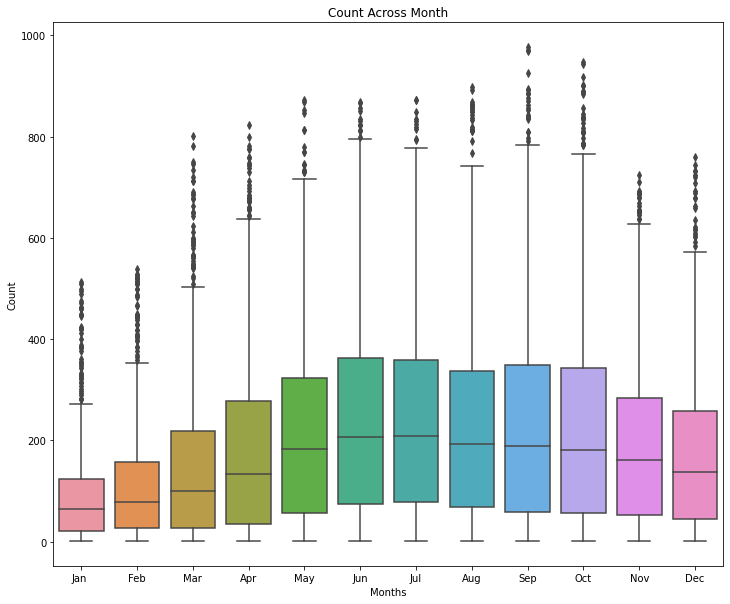

In [15]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 10)
sns.boxplot(data=df_bike, y="count", x="month_str",orient="v")
ax.set(xlabel="Months" , ylabel="Count", title="Count Across Month");

The plotbox above expresses the distribution of the amount of users based on the month of the year. From what we can see, the users use the bike service the most from April to October. We can assume that in this period of the year the weather allows the users to ride the bike, as the probability of rain is pretty low. We can conclude therefore that the weather will be a deciding factor for renting the bike.

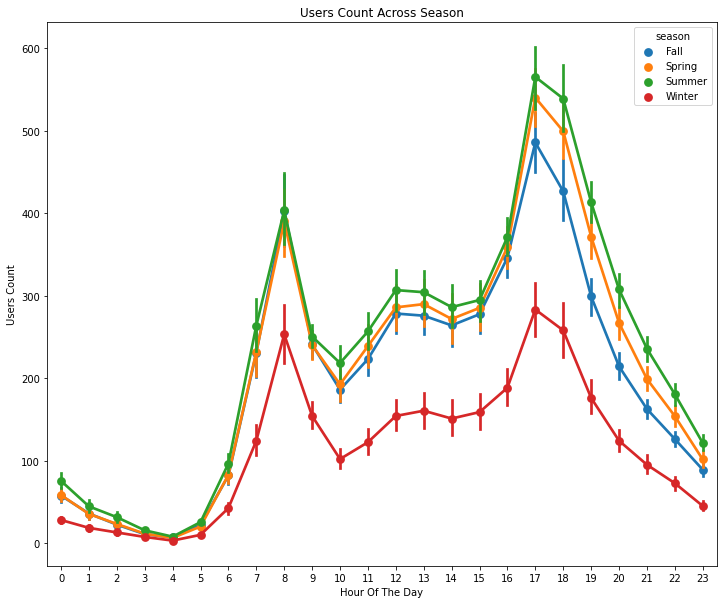

In [18]:
fig, axes = plt.subplots()
fig.set_size_inches(12, 10)
sns.pointplot(x=df_bike["hour"], y=df_bike["count"], hue=df_bike["season"])
axes.set(xlabel="Hour Of The Day", ylabel="Users Count", title="Users Count Across Season");

The pointplot above shows the user count across each season plot against the hour of the day. As we already saw in the previous graph, the 3 seasons with the highest user count are fall, spring and summer (which coincide with the months we identified previously). Furthermore, from this graph, we can see that, regardless of the season, the bikes are being used mostly between 6-9 am and 4-7 pm. This behavior lets us assume that the bikes are being mostly used at the beginning and at the end of the working day. 

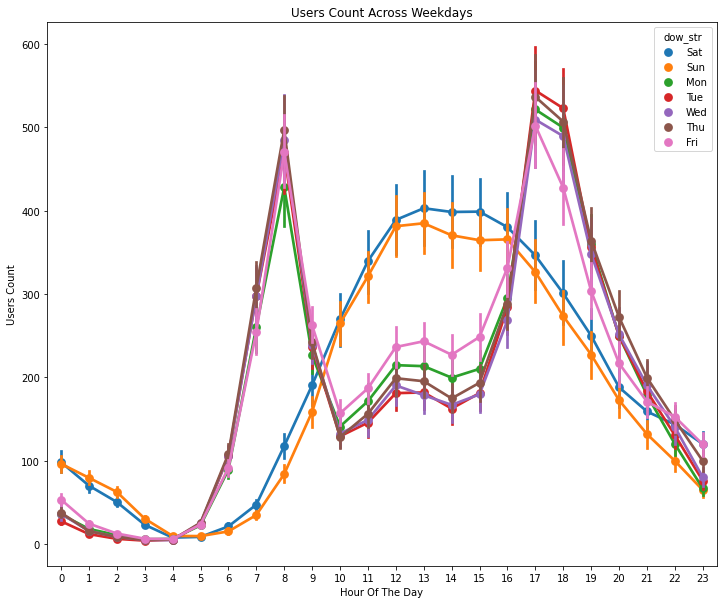

In [19]:
fig, axes = plt.subplots()
fig.set_size_inches(12, 10)
sns.pointplot(x=df_bike["hour"], y=df_bike["count"], hue=df_bike["dow_str"])
axes.set(xlabel="Hour Of The Day", ylabel="Users Count", title="Users Count Across Weekdays");

This graph shows the user count for each day of the week over the hour of the day. As we concluded from the previous graph, we can confirm that the user use the bikes mostly around that times. However, only during working days. AS a matter of fact, during saturday and sunday, the users use the bikes mostly around 10 -19, i.e. during the afternoon, reaching the peak during 12-13.  This can also be seen from the previous graph. 
This means that the hour and the day of the week are also deciding factors. 

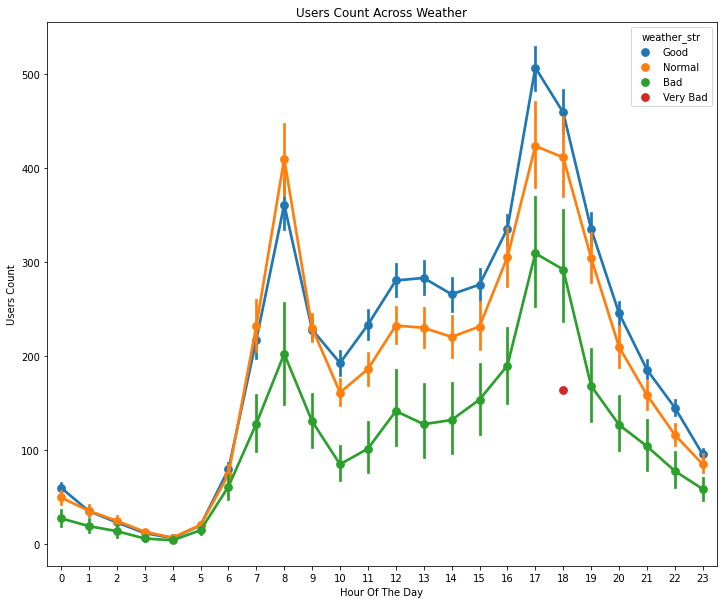

In [20]:
fig, axes = plt.subplots()
fig.set_size_inches(12, 10)
sns.pointplot(x=df_bike["hour"], y=df_bike["count"], hue=df_bike["weather_str"])
axes.set(xlabel="Hour Of The Day", ylabel="Users Count", title="Users Count Across Weather");

As we discussed before, seasons with the best weather correspond to a higher usage of the bikes. To check that, we can also plot the user count based on the weather. This graph proves what we discussed previously. Bikes are only used when the weather is relatively nice, with only one use when the erather was bad. 

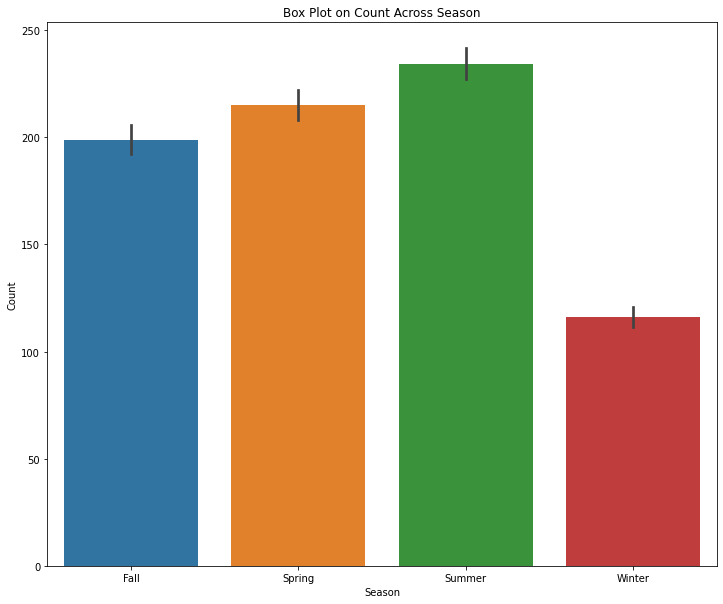

In [23]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 10)
sns.barplot(data=df_bike, y="count", x="season",orient="v")
ax.set(xlabel='Season', ylabel='Count', title="Box Plot on Count Across Season");

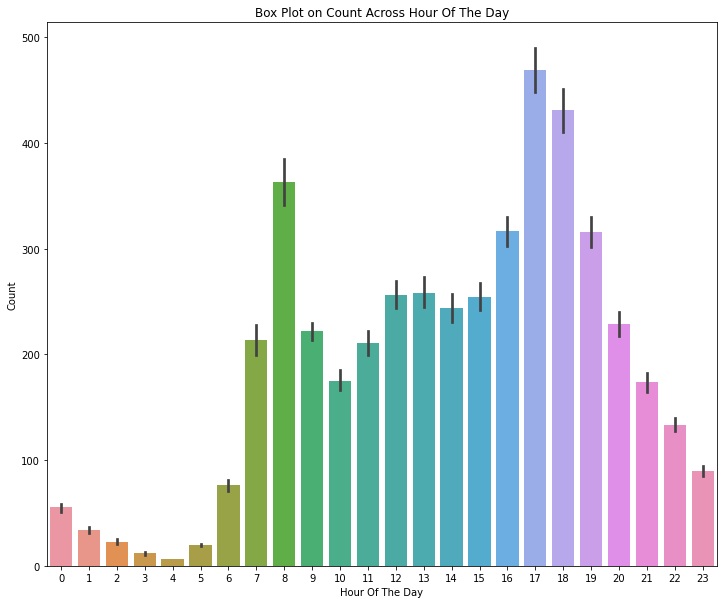

In [25]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 10)
sns.barplot(data=df_bike, y="count", x="hour", orient="v")
ax.set(xlabel='Hour Of The Day', ylabel='Count', title="Box Plot on Count Across Hour Of The Day");

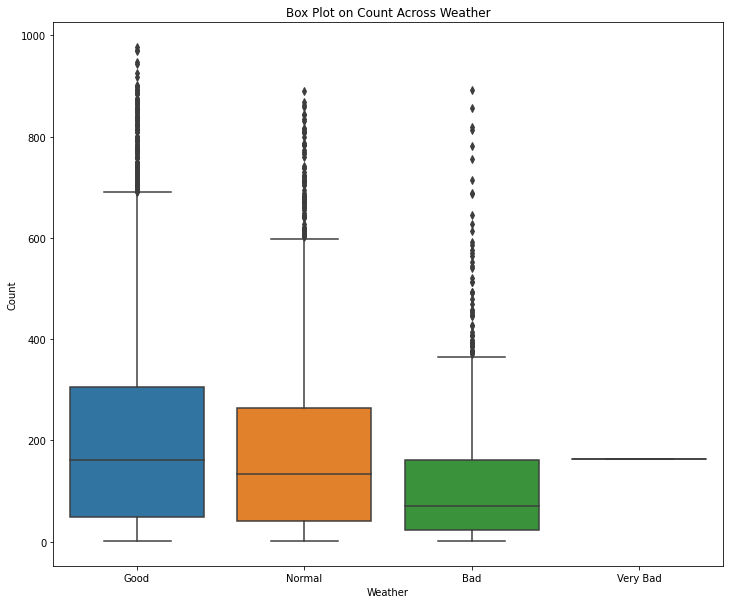

In [28]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 10)
sns.boxplot(data=df_bike, y="count", x="weather_str",orient="v")
ax.set(xlabel='Weather', ylabel='Count', title="Box Plot on Count Across Weather");

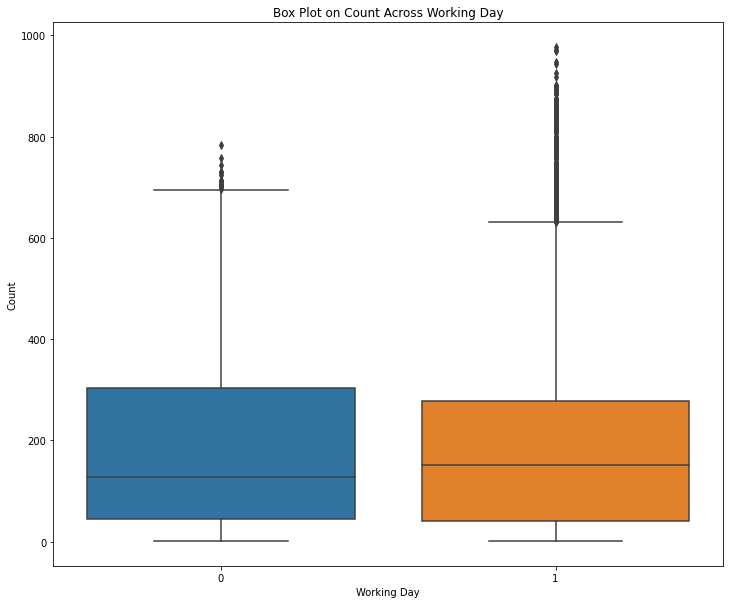

In [31]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 10)
sns.boxplot(data=df_bike, y="count", x="workingday", orient="v");
ax.set(xlabel='Working Day', ylabel='Count', title="Box Plot on Count Across Working Day");

In [1]:
fig, axes = plt.subplots(1,2)
fig.set_size_inches(12, 10)
sns.pointplot(x=df_bike["hour"], y=df_bike["registered"], hue=df_bike["workingday"], ax=axes[0])
sns.pointplot(x=df_bike["hour"], y=df_bike["registered"], hue=df_bike["holiday"], ax=axes[1]);

NameError: name 'plt' is not defined

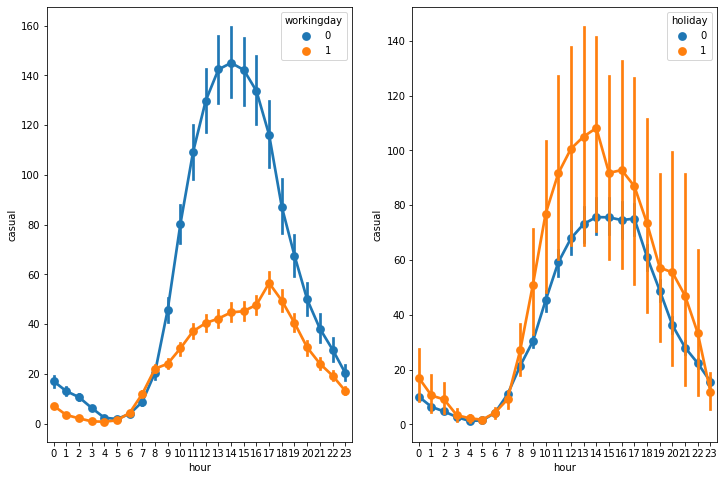

In [41]:
fig, axes = plt.subplots(1,2)
fig.set_size_inches(12, 8)
sns.pointplot(x=df_bike["hour"], y=df_bike["casual"], hue=df_bike["workingday"], ax=axes[0])
sns.pointplot(x=df_bike["hour"], y=df_bike["casual"], hue=df_bike["holiday"], ax=axes[1]);

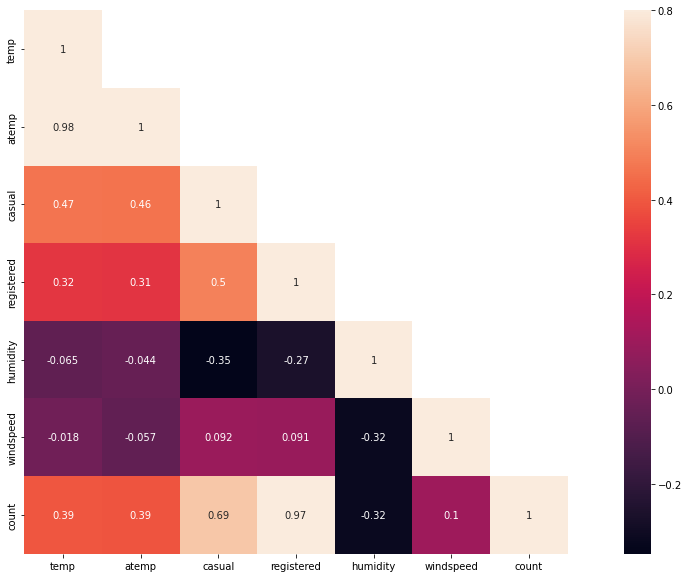

In [51]:
cm = df_bike[["temp","atemp","casual","registered","humidity","windspeed","count"]].corr()
mask = np.array(cm)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(cm, mask=mask,vmax=.8, square=True,annot=True);

### Finally, let's prepare the dataset for the ML models

In [43]:
X = df_bike.loc[:, df_bike.columns != "count"]
y = np.log1p(df_bike["count"])

In [44]:
X = X.drop(columns=["datetime", "atemp", "month_str", "season", "dow_str", "weather_str", "casual", "registered"], axis=1)
X.head()

,holiday,workingday,weather,temp,humidity,windspeed,dow,month,week,hour,year
0,0,0,1,9.84,81,0.0,5,1,52,0,2011
1,0,0,1,9.02,80,0.0,5,1,52,1,2011
2,0,0,1,9.02,80,0.0,5,1,52,2,2011
3,0,0,1,9.84,75,0.0,5,1,52,3,2011
4,0,0,1,9.84,75,0.0,5,1,52,4,2011


In [45]:
y.head()

0    2.833213
1    3.713572
2    3.496508
3    2.639057
4    0.693147
Name: count, dtype: float64

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [47]:
def rmsle(y, y_,convertExp=True):
    if convertExp:
        y = np.exp(y),
        y_ = np.exp(y_)
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

In [48]:
from sklearn.linear_model import LinearRegression

# Initialize linear regression model
lr = LinearRegression()

# Train the model
lr.fit(X = X_train, y = y_train)

# Make predictions
y_pred = lr.predict(X_test)
print("RMSLE Value For Linear Regression:",rmsle(y_test, y_pred))

RMSLE Value For Linear Regression: 0.9536565340973293


In [54]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100) 
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("RMSLE Value For Random Forest:",rmsle(y_test, y_pred))

RMSLE Value For Random Forest: 0.2714890747328952


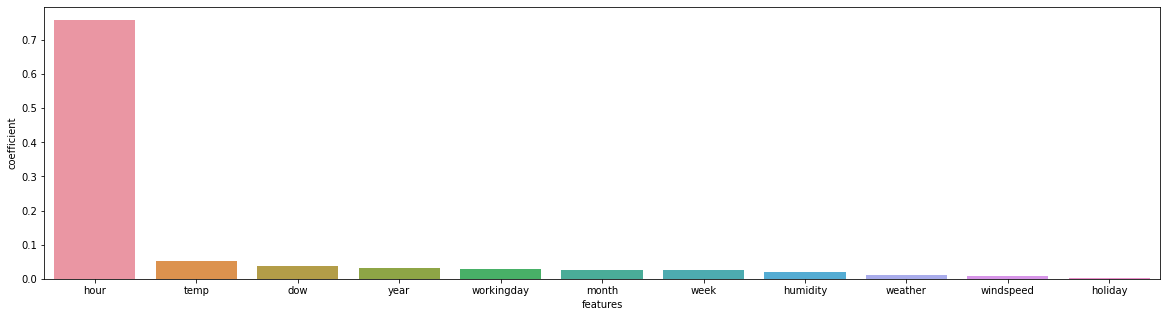

In [55]:
features = pd.DataFrame()
features["features"] = X_train.columns
features["coefficient"] = rf.feature_importances_
features.sort_values(by=["coefficient"], ascending=False, inplace=True)
fig,ax= plt.subplots()
fig.set_size_inches(20,5)
sns.barplot(data=features, x="features", y="coefficient");

In [56]:
from sklearn.ensemble import GradientBoostingRegressor
gbm = GradientBoostingRegressor(n_estimators=4000,alpha=0.01) 
gbm.fit(X_train, y_train)
y_pred = gbm.predict(X_test)
print("RMSLE Value For Gradient Boost:",rmsle(y_test, y_pred))

RMSLE Value For Gradient Boost: 0.25418162546413114


In [58]:
df_test = pd.read_csv("test.csv")
df_sample = pd.read_csv("sampleSubmission.csv")
df_test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [59]:
df_test["datetime"] = pd.to_datetime(df_test["datetime"])
df_test["dow"] = df_test["datetime"].dt.dayofweek
df_test["month"] = df_test["datetime"].dt.month
df_test["week"] = df_test["datetime"].dt.week
df_test["hour"] = df_test["datetime"].dt.hour
df_test["year"] = df_test["datetime"].dt.year

In [60]:
datetimecol = df_test["datetime"]
df_test = df_test.drop(columns=["datetime", "atemp", "season"], axis=1)
df_test.head()

,holiday,workingday,weather,temp,humidity,windspeed,dow,month,week,hour,year
0,0,1,1,10.66,56,26.0027,3,1,3,0,2011
1,0,1,1,10.66,56,0.0000,3,1,3,1,2011
2,0,1,1,10.66,56,0.0000,3,1,3,2,2011
3,0,1,1,10.66,56,11.0014,3,1,3,3,2011
4,0,1,1,10.66,56,11.0014,3,1,3,4,2011


In [62]:
y_pred_final = np.exp(gbm.predict(df_test))
submission = pd.DataFrame({
        "datetime": datetimecol,
        "count": [max(0, x) for x in y_pred_final]
    })
submission.to_csv('bike_prediction_output.csv', index=False)
submission.head()

,datetime,count
0,2011-01-20 00:00:00,11.635333
1,2011-01-20 01:00:00,6.144191
2,2011-01-20 02:00:00,4.170958
3,2011-01-20 03:00:00,3.020862
4,2011-01-20 04:00:00,2.386718
